In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import statistics as stats

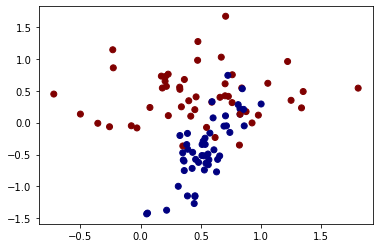

In [335]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=0.5, random_state=11)

plt.scatter(x=X[:, 0], y=X[:, 1], c=y , cmap='jet');

In [336]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.1 , random_state=0 , stratify=y)

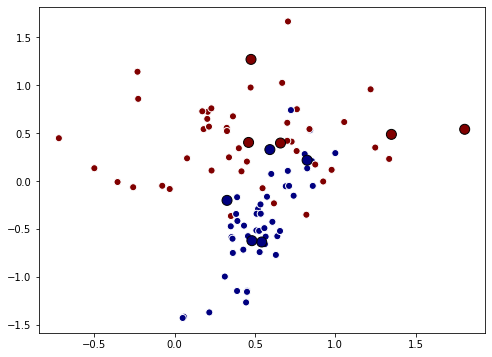

In [337]:
plt.figure(figsize=(8 , 6))
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train , cmap='jet', ec='white' , s=50);
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_test, cmap='jet' , s=100 , ec='k');

In [338]:
class KNN:
    
    def __init__(self , k):
        self.k = k

        
    def fit(self , x , y):
        self.x = x
        self.y = y
        
    def predict(self , x):
        y_hats = []
        for i in x:
            dist = np.linalg.norm(self.x - i , axis=1)
            sort_dist = np.argsort(dist)[:self.k]
            labels = self.y[sort_dist]
            print(labels)
            y_hat = stats.mode(labels)
            y_hats.append(y_hat)
        return y_hats
    
    def score(self , x , y):
        y_hat = self.predict(x)
        score = np.sum(y_hat == y) / len(y)
        return score

In [342]:
model = KNN(3)

In [343]:
model.fit(X_train , y_train)

In [344]:
model.score(X_test , y_test)

[1 1 1]
[1 1 1]
[0 0 1]
[1 1 1]
[1 1 1]
[0 0 1]
[0 0 0]
[0 0 0]
[1 1 1]
[1 1 1]


0.9